In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [3]:
data_path = "../data/Sample - Superstore.csv"

df = pd.read_csv(data_path, encoding="latin1")

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.shape



(9994, 21)

In [11]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [13]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100

total_orders = df['Order ID'].nunique()
total_customers = df['Customer ID'].nunique()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Profit Margin: {profit_margin:.2f}%")
print(f"Total Orders: {total_orders}")
print(f"Total Customers: {total_customers}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Profit Margin: 12.47%
Total Orders: 5009
Total Customers: 793


In [14]:
monthly_sales = (
    df
    .groupby(df['Order Date'].dt.to_period("M"))['Sales']
    .sum()
    .reset_index()
)

monthly_sales['Order Date'] = monthly_sales['Order Date'].astype(str)


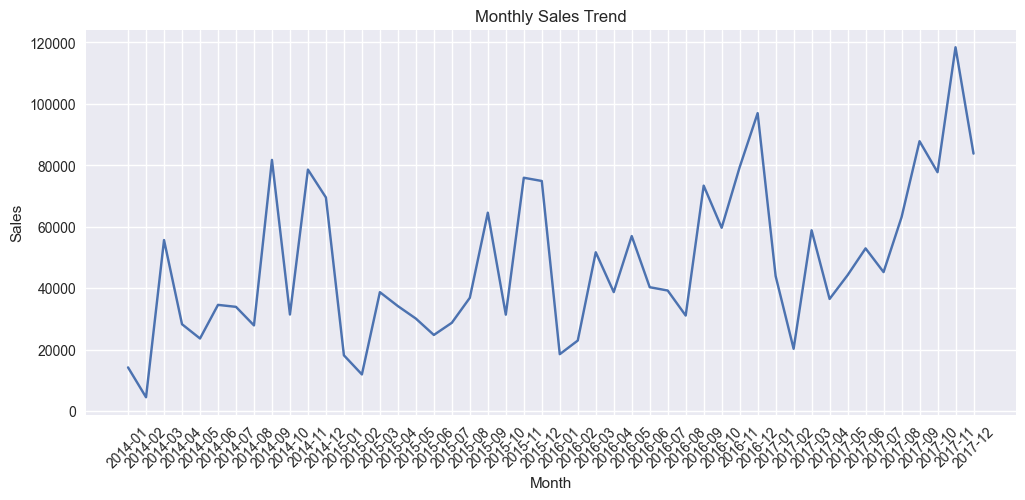

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='Order Date', y='Sales')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [16]:
region_perf = (
    df.groupby('Region')[['Sales', 'Profit']]
    .sum()
    .reset_index()
)

region_perf


,Region,Sales,Profit
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


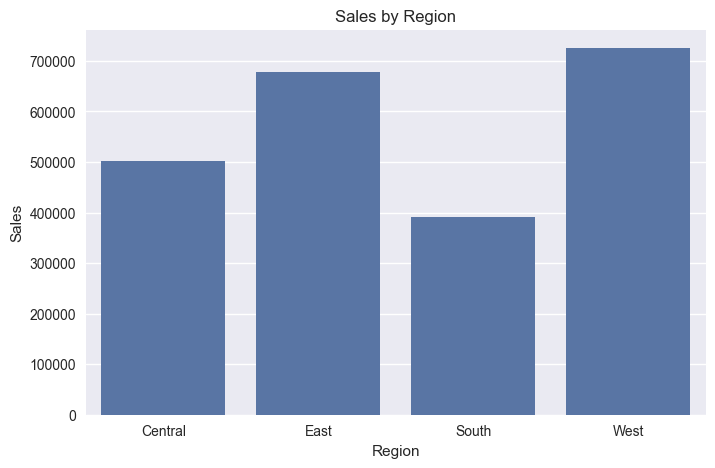

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data=region_perf, x='Region', y='Sales')
plt.title("Sales by Region")
plt.show()


In [18]:
category_profit = (
    df.groupby(['Category', 'Sub-Category'])['Profit']
    .sum()
    .reset_index()
    .sort_values(by='Profit', ascending=False)
)

category_profit.head(10)

,Category,Sub-Category,Profit
14,Technology,Copiers,55617.8249
16,Technology,Phones,44515.7306
13,Technology,Accessories,41936.6357
10,Office Supplies,Paper,34053.5693
6,Office Supplies,Binders,30221.7633
1,Furniture,Chairs,26590.1663
11,Office Supplies,Storage,21278.8264
4,Office Supplies,Appliances,18138.0054
2,Furniture,Furnishings,13059.1436
7,Office Supplies,Envelopes,6964.1767


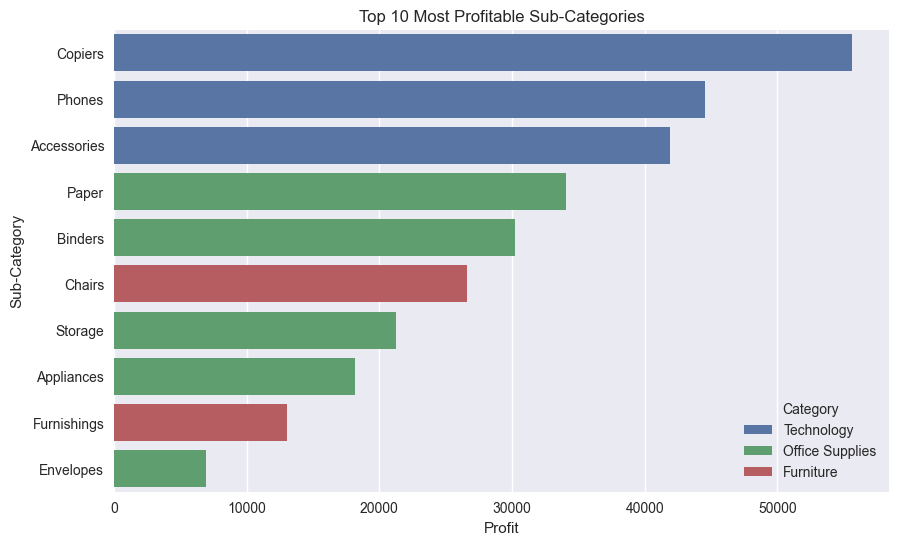

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=category_profit.head(10),
    x='Profit',
    y='Sub-Category',
    hue='Category'
)
plt.title("Top 10 Most Profitable Sub-Categories")
plt.show()

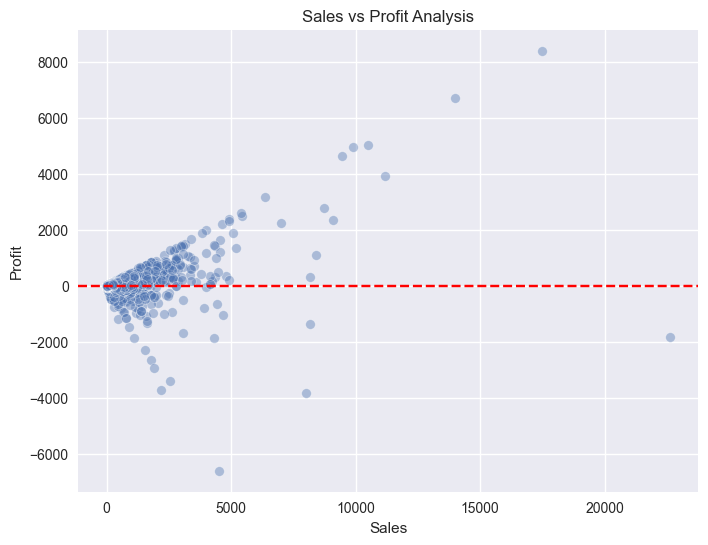

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Sales', y='Profit', alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title("Sales vs Profit Analysis")
plt.show()


In [21]:
ship_mode_perf = (
    df.groupby('Ship Mode')[['Sales', 'Profit']]
    .sum()
    .reset_index()
)

ship_mode_perf


,Ship Mode,Sales,Profit
0,First Class,3.514284e+05,48969.8399
1,Same Day,1.283631e+05,15891.7589
2,Second Class,4.591936e+05,57446.6354
3,Standard Class,1.358216e+06,164088.7875


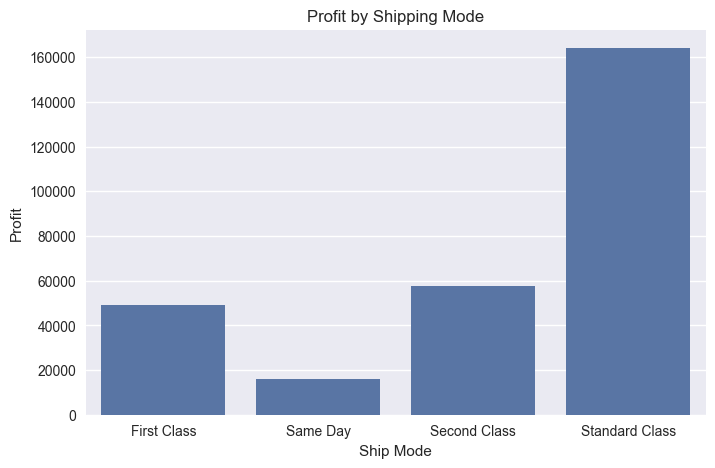

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=ship_mode_perf, x='Ship Mode', y='Profit')
plt.title("Profit by Shipping Mode")
plt.show()


In [23]:
df.to_csv("../data/cleaned_superstore.csv", index=False)